#### Trajectory extraction from 2 types of sensors: wheel encoders and gyro.
Robot was driven by hand.

In [92]:
# open files

with open('dich/left_wheel.rtf') as f:
    lw = f.readlines()
lw = [int(x.strip()) for x in lw]

with open('dich/right_wheel.rtf') as f:
    rw = f.readlines()
rw = [int(x.strip()) for x in rw]

with open('dich/gyro.rtf') as f:
    gyro = f.readlines()
gyro = [float(x.strip()) for x in gyro]
gyro = [x - gyro[0] for x in gyro] 

print('Number of measures:',len(rw))

Number of measures: 1586


In [107]:
import matplotlib.pyplot as plt
import numpy as np

r = 27 # radius in mm
l = 2 * np.pi * r
b = 110 # distance between wheels in mm
# plt.plot(lw,rw)
# plt.show()

I calculate x, y and theta using the following formulae:
![formulae](Photo/formulae.jpg)

In [108]:
# convert wheel encoders data to x, y and theta parameters.

x = []
x.append(0)
y = []
y.append(0)
teta = []
teta.append(0)
for num in range(1,len(rw)):
    dsr = (rw[num] - rw[num - 1]) /360 *  l # right wheel way in current step, mm
    dsl = (lw[num] - lw[num - 1]) /360 *  l

    dteta = (dsr - dsl) / b
    dx = (dsr + dsl)/2 * np.cos(teta[num-1] - dteta / 2)
    dy = (dsr + dsl)/2 * np.sin(teta[num-1] - dteta / 2)
    x.append(x[num-1] + dx)
    y.append(y[num-1] + dy)
    teta.append(teta[num-1] + dteta)
#     print(rw[num], lw[num], dteta, dx, dy)


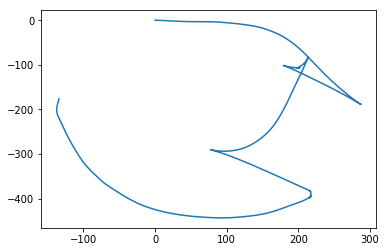

In [109]:
# plot the movement of the robot from wheel encoders point of view
plt.plot(x,y)
plt.show()

In [86]:
# for i in range(len(x)):
#     print(x[i],y[i],teta[i])

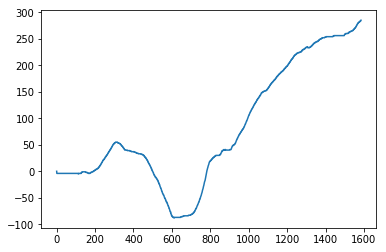

In [81]:
plt.plot(gyro)
plt.show()

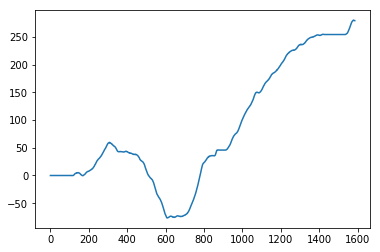

In [110]:
# teta = teta * (-1)
teta = [-x * 180 / np.pi for x in teta] # convert theta from Rad to Deg and invert
plt.plot(teta)
plt.show()

total difference: -5621.224999999647


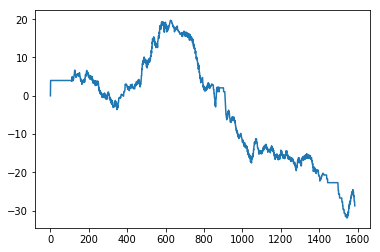

In [106]:
# Calculate difference between gyroscope and 
dangle = [None] * len(x)
for i in range(len(x)):
    dangle[i] = teta[i] - gyro[i]

print('total difference:',sum(dangle)) # may be neede to optimize parameter 'b'
plt.plot(dangle)
plt.show()

#### Let's use Kalman Filter
We have two sources of information only for theta, so we will apply Kalman to theta. Nevertheless, it will affect also 'x' and 'y' coordinates, because they are dedicated by sine and cosine of theta.

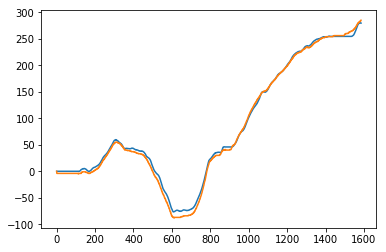

In [111]:
plt.plot(teta)
plt.plot(gyro)
plt.show()